In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/cleaned.csv').drop(columns = ['Unnamed: 0'])
df.head()

,Number,CreatedDate,Priority,Account,ACV,UpcomingACVOpportunities,AccountCountry,AccountIndustry,CreatedMonth,InquiryType
0,CS96304,2020-01-01 02:30:00,Very Low,142,10125545.34,-121800.28,United Kingdom,Retailer,2020-01,Question about the product
1,CS71638,2020-01-02 19:10:00,High,154,873271.83,159409.06,Mexico,Information Security,2020-01,Question about the product
2,CS44369,2020-01-04 04:50:00,High,127,11961103.07,2752627.26,Mexico,Information Security,2020-01,Question about the product
3,CS61103,2020-01-05 02:01:00,Critical,179,64658626.07,47779.11,Canada,Technology,2020-01,Issue with the product
4,CS67928,2020-01-05 03:08:00,High,115,16274282.36,377871.90,Japan,Information Security,2020-01,Question about the product


### Security team's initial observation: there is a spike in total ACV from customers who filed cases in the month of March 2023

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Total ACV ($)')]

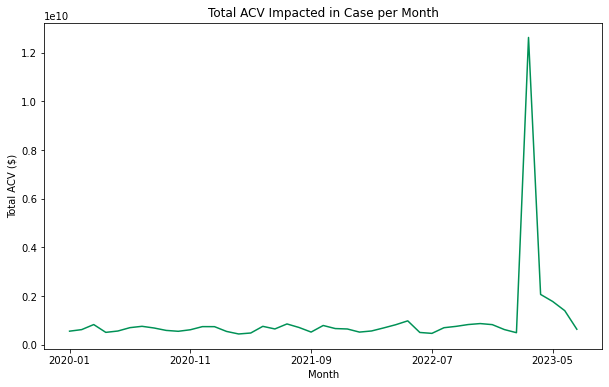

In [120]:
ax = df.groupby('CreatedMonth').sum()['ACV'].plot(title='Total ACV Impacted in Case per Month', color='#009156', figsize=(10,6))
ax.set(xlabel='Month', ylabel='Total ACV ($)')

### Could this have to do with outliers - few customers with very high ACV that filed a case only in March 2023?

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Average ACV ($)')]

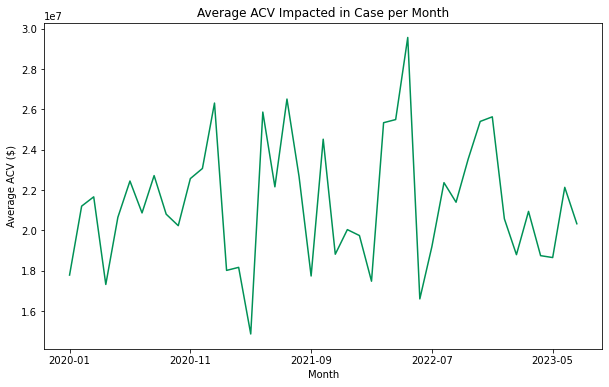

In [119]:
ax = df.groupby('CreatedMonth').mean()['ACV'].plot(title='Average ACV Impacted in Case per Month', color='#009156', figsize=(10,6))
ax.set(xlabel='Month', ylabel='Average ACV ($)')

Here we see that that spikes and dips in average ACV happen in April 2021, May 2022, and August 2022 due to a few customer cases of very high or very low ACVs -> however there is no unusual activity in March 2023 when our ACV spike happened so it cannot be due to outliers 

### The spike has to do with the correlated overall increase in customer support cases in March 2023 

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Total Support Cases')]

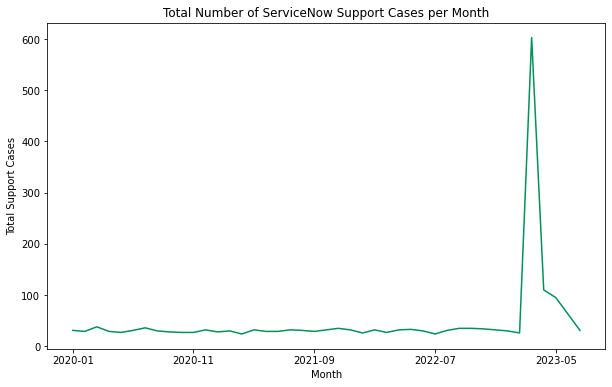

In [118]:
ax = df.groupby('CreatedMonth').count()['Account'].plot(title='Total Number of ServiceNow Support Cases per Month', color='#009156', figsize=(10,6))
ax.set(xlabel='Month', ylabel='Total Support Cases')

### What is the composition of these cases based on their priority, industry, and inquiry type? 

In [12]:
spike = df[df['CreatedMonth']=='2023-03']
spike.head()

,Number,CreatedDate,Priority,Account,ACV,UpcomingACVOpportunities,AccountCountry,AccountIndustry,CreatedMonth,InquiryType
1155,CS77753,2023-03-01 15:24:00,Very Low,253,1081342.70,1563083.74,United Kingdom,Public Sector,2023-03,Question about the product
1156,CS74694,2023-03-02 07:09:00,Medium,5,44456467.06,1229902.33,United States,Public Sector,2023-03,Contract Support
1157,CS33805,2023-03-02 11:54:00,Medium,130,17641667.39,815028.15,United Kingdom,Public Sector,2023-03,Issue with the product
1158,CS72569,2023-03-02 22:12:00,Very Low,97,23682497.08,1147889.55,Norway,Public Sector,2023-03,Security Concern
1159,CS14827,2023-03-03 01:15:00,Low,99,2049471.40,-271582.04,Japan,Public Sector,2023-03,Contract Support


In [81]:
def get_spike_props(col, condition):
    total_cases = df[df[col]==condition].shape[0]
    march_cases = df[(df[col]==condition) & (df['CreatedMonth']=='2023-03')].shape[0]
    return march_cases / total_cases 

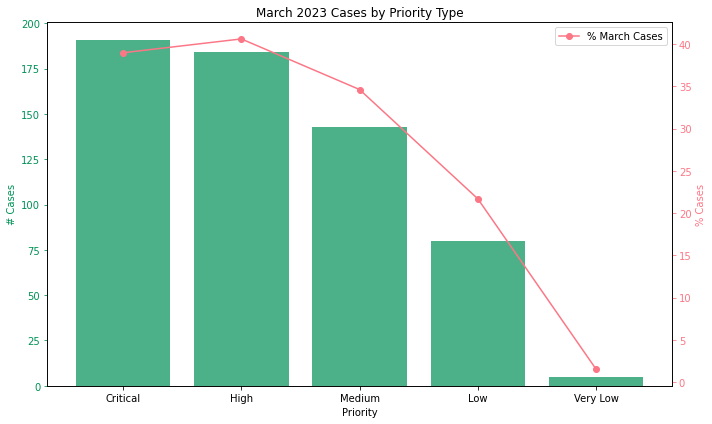

In [122]:
march_counts = spike[spike['CreatedMonth'] == '2023-03']['Priority'].value_counts()

percentages = []
for priority in march_counts.index:
    percentage = get_spike_props('Priority', priority) * 100
    percentages.append(percentage)

plot_data = pd.DataFrame({'March Counts': march_counts, 'March Percentage': percentages})

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(plot_data.index, plot_data['March Counts'], color='#009156', alpha=0.7, label='March Counts')
ax1.set_xlabel('Priority')
ax1.set_ylabel('# Cases', color='#009156')
ax1.tick_params('y', colors='#009156')
ax1.set_title('March 2023 Cases by Priority Type')

ax2 = ax1.twinx()
ax2.plot(plot_data.index, plot_data['March Percentage'], color='#FC7786', marker='o', label='% March Cases')
ax2.set_ylabel('% Cases', color='#FC7786')
ax2.tick_params('y', colors='#FC7786')

fig.tight_layout()
plt.legend()
plt.show()

In [123]:
plot_data

,March Counts,March Percentage
Critical,191,38.979592
High,184,40.618102
Medium,143,34.624697
Low,80,21.680217
Very Low,5,1.506024


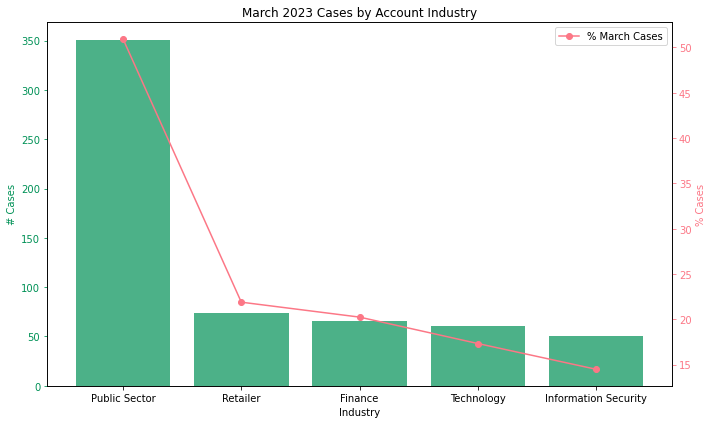

In [124]:
# what does the industry of these cases look like in spike month 
march_counts = spike[spike['CreatedMonth'] == '2023-03']['AccountIndustry'].value_counts()

percentages = []
for ind in march_counts.index:
    percentage = get_spike_props('AccountIndustry', ind) * 100
    percentages.append(percentage)

plot_data = pd.DataFrame({'March Counts': march_counts, 'March Percentage': percentages})

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(plot_data.index, plot_data['March Counts'], color='#009156', alpha=0.7, label='March Counts')
ax1.set_xlabel('Industry')
ax1.set_ylabel('# Cases', color='#009156')
ax1.tick_params('y', colors='#009156')
ax1.set_title('March 2023 Cases by Account Industry')

ax2 = ax1.twinx()
ax2.plot(plot_data.index, plot_data['March Percentage'], color='#FC7786', marker='o', label='% March Cases')
ax2.set_ylabel('% Cases', color='#FC7786')
ax2.tick_params('y', colors='#FC7786')

fig.tight_layout()
plt.legend()
plt.show()

In [125]:
plot_data

,March Counts,March Percentage
Public Sector,351,50.943396
Retailer,74,21.893491
Finance,66,20.245399
Technology,61,17.329545
Information Security,51,14.488636


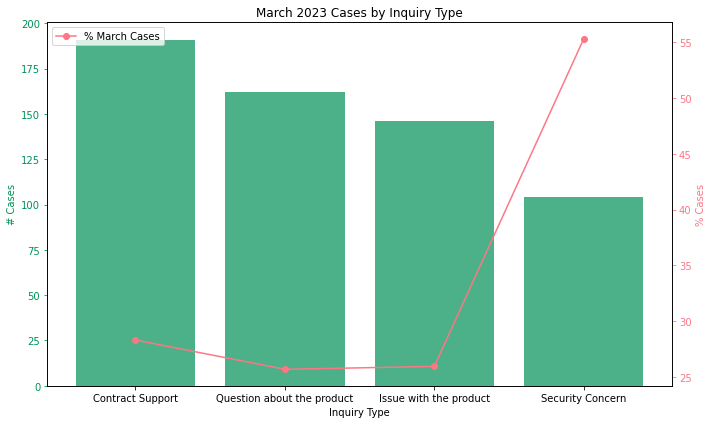

In [126]:
# what does the inquiry type of these cases look like in spike month 
march_counts = spike[spike['CreatedMonth'] == '2023-03']['InquiryType'].value_counts()

percentages = []
for inq in march_counts.index:
    percentage = get_spike_props('InquiryType', inq) * 100
    percentages.append(percentage)

plot_data = pd.DataFrame({'March Counts': march_counts, 'March Percentage': percentages})

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(plot_data.index, plot_data['March Counts'], color='#009156', alpha=0.7, label='March Counts')
ax1.set_xlabel('Inquiry Type')
ax1.set_ylabel('# Cases', color='#009156')
ax1.tick_params('y', colors='#009156')
ax1.set_title('March 2023 Cases by Inquiry Type')

ax2 = ax1.twinx()
ax2.plot(plot_data.index, plot_data['March Percentage'], color='#FC7786', marker='o', label='% March Cases')
ax2.set_ylabel('% Cases', color='#FC7786')
ax2.tick_params('y', colors='#FC7786')

fig.tight_layout()
plt.legend()
plt.show()

In [127]:
plot_data

,March Counts,March Percentage
Contract Support,191,28.296296
Question about the product,162,25.673534
Issue with the product,146,25.932504
Security Concern,104,55.319149


Based on our observations, cases in March 2023 compared to the overall distribution of cases were: 
* not very low priority 
* largely from the public sector industry 
* contained a lot more security concerns 

### How do we know this pattern isn't reflected in every month?
* there is a constant minority of low priority cases
* public sector isn't just a leading industry in all customer cases
* security concerns are not uniform

[Text(0.5, 0, 'Month'), Text(0, 0.5, '% Security Concern Cases')]

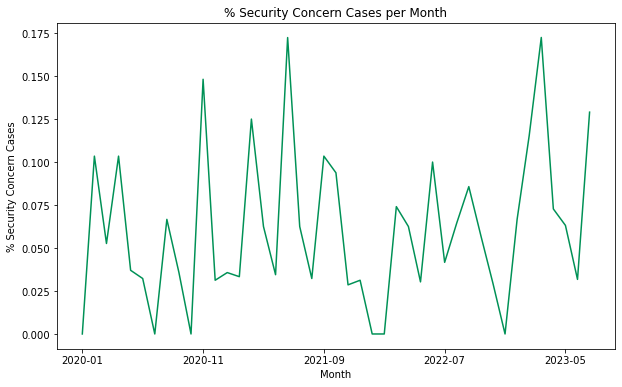

In [89]:
# security concern inquiry type
sc_proportions = df[df['InquiryType'] == 'Security Concern'].pivot_table(index='CreatedMonth', aggfunc='size') / df.groupby('CreatedMonth').size()
sc_proportions = sc_proportions.fillna(0)
ax = sc_proportions.plot(title='% Security Concern Cases per Month', color='#009156', figsize=(10,6))
ax.set(xlabel='Month', ylabel='% Security Concern Cases')

Even though there are drastic fluctuations with the security concern cases per month, there is still a significant spike seen in March 2023 leading to the possibility that some vulnerability was exposed in a product that month

[Text(0.5, 0, 'Month'), Text(0, 0.5, '% Public Sector Cases')]

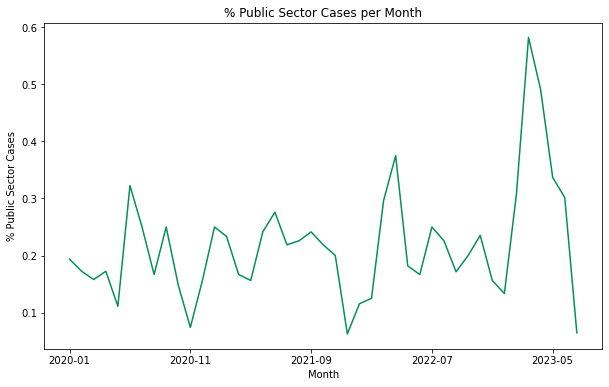

In [90]:
# proportion of public sector acc cases 
ps_proportions = df[df['AccountIndustry'] == 'Public Sector'].pivot_table(index='CreatedMonth', aggfunc='size') / df.groupby('CreatedMonth').size()
ps_proportions = ps_proportions.fillna(0)
ax = ps_proportions.plot(title='% Public Sector Cases per Month', color='#009156', figsize=(10,6))
ax.set(xlabel='Month', ylabel='% Public Sector Cases')

[Text(0.5, 0, 'Month'), Text(0, 0.5, '% Very Low Priority Cases')]

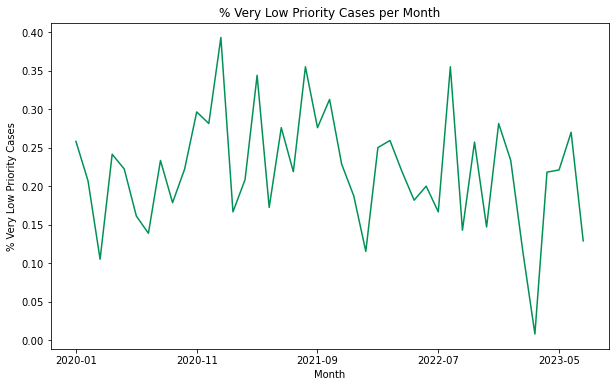

In [91]:
# very low priority
vlp_proportions = df[df['Priority'] == 'Very Low'].pivot_table(index='CreatedMonth', aggfunc='size') / df.groupby('CreatedMonth').size()
vlp_proportions = vlp_proportions.fillna(0)
ax = vlp_proportions.plot(title='% Very Low Priority Cases per Month', color='#009156', figsize=(10,6))
ax.set(xlabel='Month', ylabel='% Very Low Priority Cases')

We see that the proportion of cases matching low priority, public sector, and security concern cases is very different in the month of March 2023 compared to all other months confirming that the spike may be correlated to these factors. 

### Could there be an even narrowed time frame within the month where these cases spiked?

<ipython-input-92-a3c3f4cf690d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spike['CreatedDate'] = pd.to_datetime(spike['CreatedDate'])
<ipython-input-92-a3c3f4cf690d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spike['day'] = spike['CreatedDate'].dt.day
<ipython-input-92-a3c3f4cf690d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

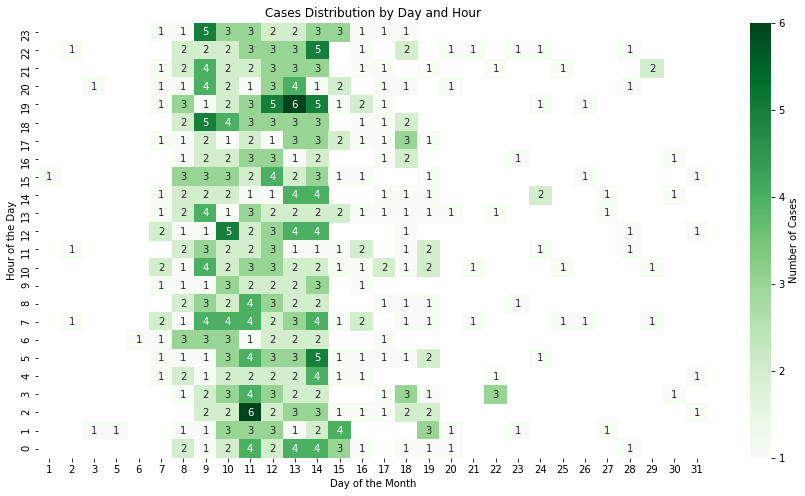

In [92]:
spike['CreatedDate'] = pd.to_datetime(spike['CreatedDate'])

spike['day'] = spike['CreatedDate'].dt.day
spike['hour'] = spike['CreatedDate'].dt.hour

pivot_table = spike.pivot_table(index='hour', columns='day', aggfunc='size')

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table[::-1], cmap='Greens', annot=True, fmt='g', cbar_kws={'label': 'Number of Cases'})
plt.title('Cases Distribution by Day and Hour')
plt.xlabel('Day of the Month')
plt.ylabel('Hour of the Day')
plt.show()

There is a surge of cases starting around March 8 - March 15 over a 7 day period where there are at times 6 customer support cases coming in one hour whereas other days there aren't even 6 overall -> worth looking into that specific distribution

### What do the specific cases in that week look like? 

In [95]:
temp = spike[(spike['day']>=8) & (spike['day']<=15)]

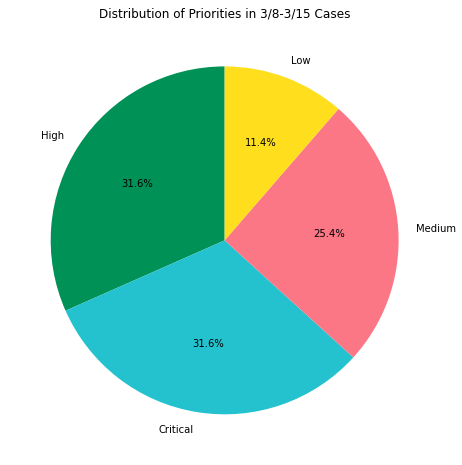

In [106]:
pri_distrib = temp['Priority'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(pri_distrib, labels=pri_distrib.index, autopct='%1.1f%%', startangle=90, colors=['#009156', '#24C2CE', '#FC7786', '#FFDE1D'])
plt.title('Distribution of Priorities in 3/8-3/15 Cases')
plt.show()

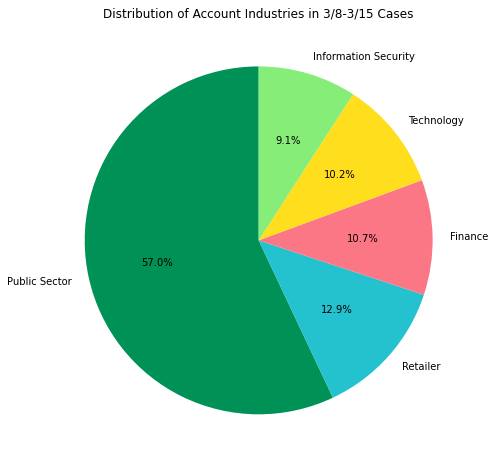

In [109]:
ind_distrib = temp['AccountIndustry'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(ind_distrib, labels=ind_distrib.index, autopct='%1.1f%%', startangle=90, colors=['#009156', '#24C2CE', '#FC7786', '#FFDE1D', '#86ED78'])
plt.title('Distribution of Account Industries in 3/8-3/15 Cases')
plt.show()

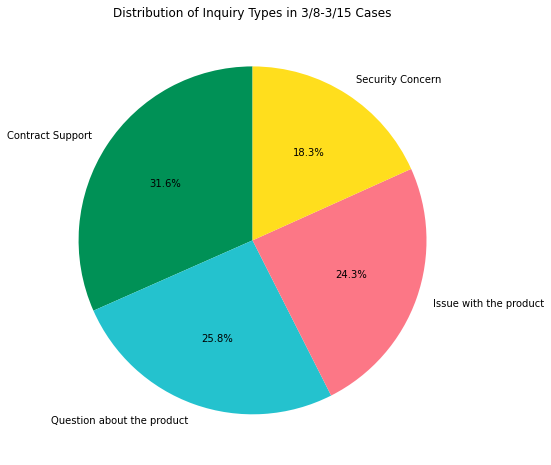

In [110]:
inq_distrib = temp['InquiryType'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(inq_distrib, labels=inq_distrib.index, autopct='%1.1f%%', startangle=90, colors=['#009156', '#24C2CE', '#FC7786', '#FFDE1D'])
plt.title('Distribution of Inquiry Types in 3/8-3/15 Cases')
plt.show()

### What is the potential impact on ACV by this influx of medium-critical priority cases revolving around a security concern in the public sector industry? 

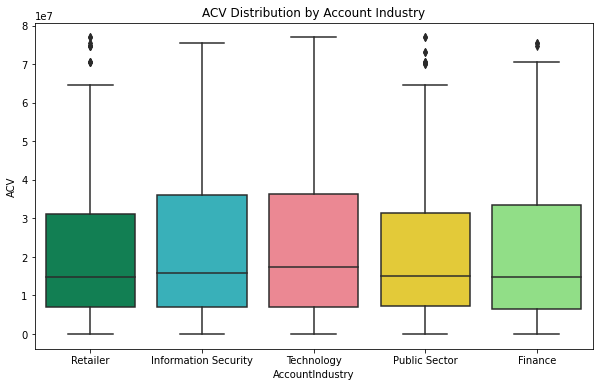

In [115]:
plt.figure(figsize=(10, 6))
colors = ['#009156', '#24C2CE', '#FC7786', '#FFDE1D', '#86ED78']
sns.boxplot(x='AccountIndustry', y='ACV', data=df, palette=colors)
plt.title('ACV Distribution by Account Industry')
plt.show()

Public Sector distribution shows that even though the average current ACV may be lower than industries like tech and information security, it has more outlier accounts that have significant amount of money with ServiceNow and that it's important to keep those accounts secure

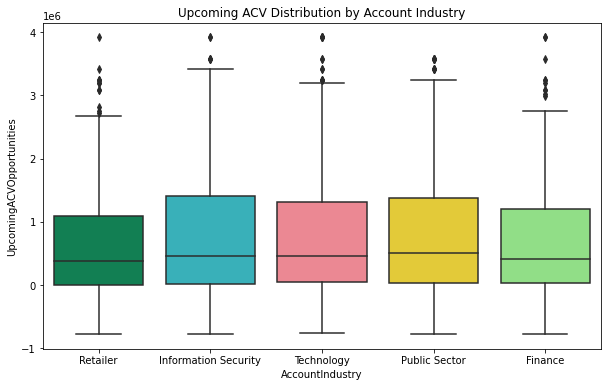

In [117]:
plt.figure(figsize=(10, 6))
colors = ['#009156', '#24C2CE', '#FC7786', '#FFDE1D', '#86ED78']
sns.boxplot(x='AccountIndustry', y='UpcomingACVOpportunities', data=df, palette=colors)
plt.title('Upcoming ACV Distribution by Account Industry')
plt.show()

Here the public sector distribution has fewer outliers but a higher average upcoming ACV value which implies that there are a lot more accounts that have high potential for growth and that is why it is important to maintain consistency in this industry 